In [1]:
#Notebooks for small tests
import os  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
#imports and plotting function
import argparse
import mat73
import logging
import numpy as np
#import torchvision
from datetime import datetime
import os
import scipy.io
from torch.utils.data import DataLoader
import io
from PIL import Image
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import wandb
import math
import torch.nn.functional as F
import torchvision.transforms as T
import torch.nn as nn
import torch
import sys
import torch.optim.lr_scheduler as lr_scheduler
import wandb
import torch
from sklearn.preprocessing import StandardScaler
import Models as M
import Helpers as H
import time
import copy
from torch.func import vmap
from functorch.experimental import replace_all_batch_norm_modules_
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.spatial import distance_matrix


%matplotlib inline

encoder_out='sigmoid'
cwd=os. getcwd()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_path=os.path.join(cwd,'Data/PNAS-regime_all_seeds/PNAS-regime_seed0')
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(medium.shape)
inners=medium.transpose().conjugate()@medium
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of data: ', coherence)
#b=np.load(data_path+'/train/b.npy')
#rho=np.load(data_path+'/train/rho.npy')
#print(np.allclose(medium@rho[0],b[0]))
index_list=[]

torch.__version__ 
from sklearn.cluster import KMeans
import numpy as np


def get_cols(decoder_locats, grid_size=400):
    Complex_eye=torch.eye(grid_size)#.to(device)
    unlabeled_data=5000
    #decoder_locats=f'/home/achristie/Codes_data/Experiment_data/rhosupport_stats/5khighcohdatamodels/'
    #decoder_locats = '/home/achristie/Codes_data/Experiment_data/rhosupport_stats/5khighcohdatamodels/'

    decoder=M.norm_linear(grid_size, 2900)  #R^ {N_k} -> C^{N_rec*N_freq}
    decoder.load_state_dict(torch.load(decoder_locats))
    medium_hat=decoder(Complex_eye).squeeze()
    medium_hat=F.normalize(medium_hat, dim=-1).squeeze()
    medium_hat=medium_hat.cpu().detach().numpy()
    #medium_hat=H.cat2complex(medium_hat)                    
    columns=np.array(medium_hat)
    return  columns


#X=get_cols('/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_0_15-19-12.pt', grid_size=484)
X=get_cols('/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_0_15-36-45.pt', grid_size=400)
X=get_cols('/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_0_15-18-43.pt', grid_size=18*18)
#grid_size=18*18
n_clust=300
columns=X

kmeans=KMeans(n_clusters=n_clust, random_state=0).fit(X)
DBSCAN_fit=DBSCAN(eps=.1).fit(X)


#torch.save(encoder.state_dict(), f'/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/enocder_{unlabeled_data}_{EXP_NUM}_{timestampStr}.pt')
#        torch.save(decoder.state_dict(), f'/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_{unlabeled_data}_{EXP_NUM}_{timestampStr}.pt')
#        torch.save(GELMA_net.state_dict(), f'/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/GELMA_{unlabeled_data}_{EXP_NUM}_{timestampStr}.pt')
#        "21-18-42"

(1450, 400)
(400, 400)
coherence of data:  0.7119395644427655


0.9999999
(1,)
maximum average inner product between centers and truemax_avg_inners_original 0.824413818301604
(1450, 1450)
coherence of centers:  0.7397307
Average Cluster size: 1.08
minimum Cluster size: 1
maximum Cluster size: 3
324
avg inner with center: 0.9439291988074043
max avg inner with center: 1.0000004768371582
min avg inner with center: 0.41973409056663513
avg distance from center: 0.06228960778983757
(324, 2900)
min max variances: 0.00034482762566767633, 0.00034381417208351195


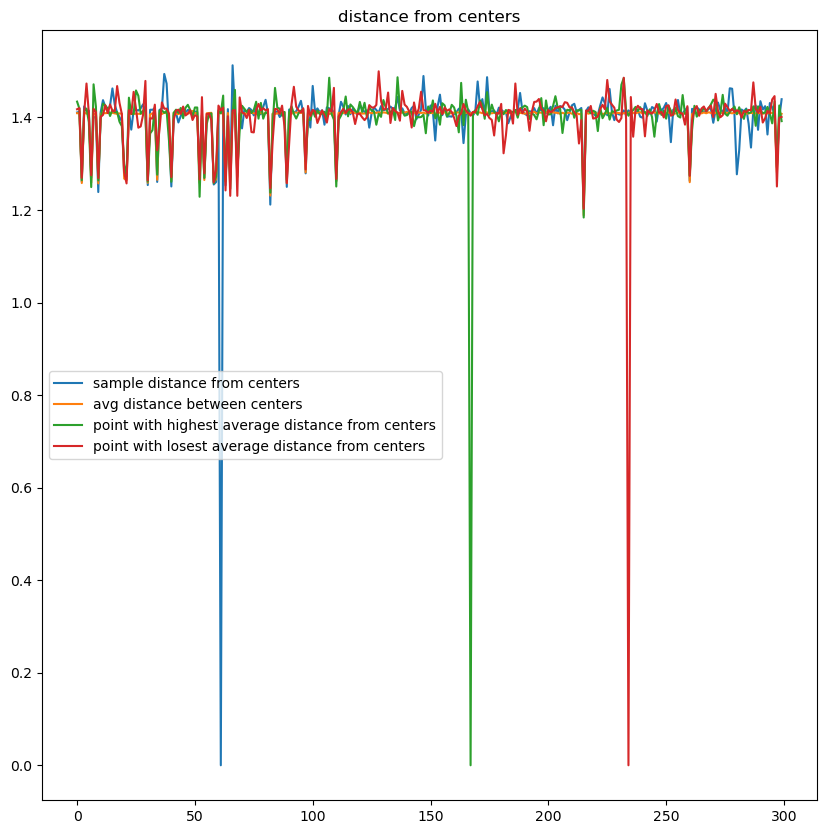

In [65]:
#graph inners of cluster
#REMARK KMEAN with dec oder initi, and random init performs much worse.
Cluster_num=99
cluster_map = pd.DataFrame()



def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

CL=ClusterIndicesNumpy(Cluster_num, kmeans.labels_)
CL_center=kmeans.cluster_centers_[Cluster_num]
complex_center=H.cat2complex(CL_center)
complex_cluster=H.cat2complex(X[CL])
inners=complex_cluster.conj()@complex_center
print(np.mean(abs(inners)))
inners_cat=np.stack((inners.real, inners.imag), axis=-1)
#plt.scatter(inners_cat[:,0], inners_cat[:,1])
print(inners.shape)

#STATS:

medium_hat=H.cat2complex(kmeans.cluster_centers_)
sum_max_inner_original=0      
torch_inners=np.abs(np.inner(medium_hat,medium.T.conj()) ) #entry i j is ghat_i dot bar(g_j) 
        #original way of computing inners
        # mean over true max over hats
index_list=[]
for i in range(400):
    if max(torch_inners[:, i])>.99 and i not in index_list:
        index_list.append(i)
    sum_max_inner_original=sum_max_inner_original+max(torch_inners[:, i])
max_avg_inners_original=sum_max_inner_original/400
print(f'maximum average inner product between centers and truemax_avg_inners_original {max_avg_inners_original}')
num_cluster_list=[len(ClusterIndicesNumpy(Cluster_num, kmeans.labels_)) for Cluster_num in range(n_clust)]
cluster_list=[ClusterIndicesNumpy(Cluster_num, kmeans.labels_) for Cluster_num in range(n_clust)]
centers=kmeans.cluster_centers_

complex_cluster_list=[H.cat2complex(X[CL]) for CL in cluster_list]

complex_center_list=[H.cat2complex(centers[CL]) for CL in range(n_clust)]
inner_list=[(abs(complex_center_list[CL].conj()@complex_cluster_list[CL].T)) for CL in range(n_clust)]
distance_list=[(np.sum((abs(complex_center_list[CL]-complex_cluster_list[CL])**2))**(1/2)) for CL in range(n_clust)]
Avg_cluster_size=np.mean(num_cluster_list)



inners=medium_hat.transpose().conjugate()@medium_hat
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of centers: ', coherence)
print(f'Average Cluster size: {Avg_cluster_size}')
print(f'minimum Cluster size: {min(num_cluster_list)}')
print(f'maximum Cluster size: {max(num_cluster_list)}')
num_ell=sum([len(inner_list[CL]) for CL in range(n_clust)])
print(num_ell)
print(f'avg inner with center: {sum([sum(i) for i in inner_list])/num_ell}')
print(f'max avg inner with center: {max([np.mean(i) for i in inner_list])}')
print(f'min avg inner with center: {min([np.mean(i) for i in inner_list])}')
print(f'avg distance from center: {sum(distance_list)/num_ell}') 



T_hold=.99

medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(columns.shape)



counts = np.bincount(kmeans.labels_)    
np.min(counts), np.max(counts), np.mean(counts)
cluster_variances = []
for i in range(n_clust):
    cluster_variances.append(np.var(X[kmeans.labels_ == i]))
print(f'min max variances: {max(cluster_variances)}, {min(cluster_variances)}')


transformed=kmeans.transform(X)
transformed.shape, X.shape
fig, axes=plt.subplots(nrows= 1, ncols= 1,figsize=(10,10))
axes.title.set_text('distance from centers')

plt.plot([i for i in range(len(transformed[0]))], transformed[99], label='sample distance from centers')
means=np.mean(transformed, axis=0)
means.shape
plt.plot([i for i in range(len(transformed[0]))], means, label='avg distance between centers')
worst_ind=np.argmax(means)
plt.plot([i for i in range(len(transformed[0]))], transformed[worst_ind], label='point with highest average distance from centers')
#plt.plot([i for i in range(len(transformed[0]))], means, label='avg distance between centers')
best_ind=np.argmin(means)
plt.plot([i for i in range(len(transformed[0]))], transformed[best_ind], label='point with losest average distance from centers')

plt.legend()

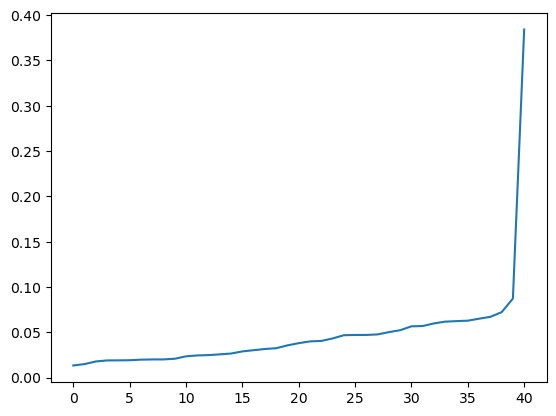

In [82]:
X=get_cols('/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_0_15-19-12.pt', grid_size=484)
#X=get_cols('/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_0_15-36-45.pt', grid_size=400)
#X=get_cols('/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_0_15-18-43.pt', grid_size=18*18)

columns=X
from scipy.spatial import distance_matrix

DBSCAN_fit=DBSCAN(eps=.5, min_samples=5).fit(X)
DBSCAN_fit.labels_
X_clustered=X[DBSCAN_fit.labels_!=-1]
len(X_clustered)
cluster_sizes=[len(X[DBSCAN_fit.labels_==i]) for i in range(max(DBSCAN_fit.labels_))]
dist_in_cluster=[]
for i in range(max(DBSCAN_fit.labels_)):
    X_in_cluster=X[DBSCAN_fit.labels_==i]
    dist_matrix=distance_matrix(X_in_cluster, X_in_cluster)
    max_dist_in_cluster=np.max(dist_matrix)
    #dist=sum((X_in_cluster[0]-X_in_cluster[1])**2)**(1/2)
    dist_in_cluster.append(max_dist_in_cluster)
   # if len(X[DBSCAN_fit.labels_==i])>1:
   #     dist_in_cluster.append(np.mean(np.sum((X[DBSCAN_fit.labels_==i]-np.mean(X[DBSCAN_fit.labels_==i], axis=0))**2, axis=1))
   # else:
   #     dist_in_cluster.append(0)
dist_in_cluster#=[np.mean(np.sum((X[DBSCAN_fit.labels_==i]-np.mean(X[DBSCAN_fit.labels_==i], axis=0))**2, axis=1)) for i in range(max(DBSCAN_fit.labels_))]
dist_in_cluster.sort()
plt.plot([i for i in range(len(dist_in_cluster))], dist_in_cluster)

In [80]:
max(cluster_sizes), sum(cluster_sizes), #Num of 

(4, 85)

In [2]:
data_path=os.path.join(cwd,'Data/PNAS-regime_all_seeds/PNAS-regime_seed0')

starttime=time.time()
target='raw'
unlabeled_data=5000
batchsize=128
L1_weight_og=1e-3
L1_weight=L1_weight_og
L1_weight_final=L1_weight_og
THRESH_HOLD_VAL=.001
layers=[4096,1024*2]#[1024,512] 3613, #[1024,256] 35 at 2500
#[500,500,500,300,300,400,800]#[3000,1000,500,300,300,300,300,300,300,300,300,300,300,300]#[3000,1500,1000,500,500,500,300,300,300,400,400,800]#[1000,1000,1000,500,500,500,300,300,300,400,400,400,800]
GELMA_layers=layers#[128]*10#[500,500,500,300,300,400,800]
CE=False
KM_in=False
INV_weight=0
RESHUFFLE=False
LR=1e-3
LR_final=LR
GELMA_OG=1e-1
GELMA=GELMA_OG
GELMA_Final=GELMA_OG
TIME_reverse=False
Scheduling=False
pixels='One-hot'
E_list=0
RESETS=0
NORMALIZE=False
G_0=True
Epochs=3000
index_list=[]
GELMA_inc=0
index_list=[]
GELMA_inc=0
def soft_threh(x, th):
    x=x.squeeze()
    real, imag=torch.split(x, int(x.shape[-1]/2), dim=-1)
    modulus=torch.sqrt(real**2+imag**2)
    modulus=relu(modulus-th)
    theta=torch.atan2(imag, real).squeeze()
    real_out=modulus*torch.cos(theta)
    imag_out=modulus*torch.sin(theta) 
    return torch.cat((real_out,imag_out),-1) #relu(torch.abs(x)-th)
data_path=os.path.join(cwd,'Data/PNAS-regime_all_seeds/PNAS-regime_seed0')
#data_path=os.path.join(cwd,'Data/FoldyLox_all_seeds/FoldyLox_seed0')
#data_path=os.path.join(cwd,'Data/PNAS-highcoh_regime_all_seeds/PNAS-highcoh_regime_seed0')

medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(medium.shape)
inners=medium.transpose().conjugate()@medium
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of data: ', coherence)


Track_run=False
#Enter your wanbd key below and uncomment wanbd code to track run on wandb
if Track_run:
    key='89a70fbc572a495206df640bd6c9cbf2a4a0dcaa' #enter your own key here
    wandb.login(key=key) 
    wandb.init(project='rtt unlabeled', name=f'Classical Gelma, longer')

    wandb.config['L1 final weight']=L1_weight_final
    wandb.config['unlabeled_data']=unlabeled_data 
    wandb.config['L1_weight']=L1_weight
    wandb.config['layers']=layers
    wandb.config['GELMA']=GELMA
    wandb.config['G_0']=G_0
    wandb.config['GELMA_layers']=GELMA_layers   
    wandb.config['inv_weight']=INV_weight
    wandb.config['CE']=CE
wand_dict={}
#GELMA_layers.append(500)
#layers.append(500)
training_data=H.data_rho_loaded(data_path+'/train',unlabeled_data/80000,pixels=pixels, normalize=NORMALIZE)
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
sigmoid = nn.Sigmoid()
softmax=nn.Softmax(dim=0)
#training_data.b=training_data.b.to(device)
#training_data.rho=training_data.rho.to(device)
#rh_t, _=torch.split(rho, 400, dim=-1)


val_data=H.data_rho_loaded(data_path+'/val', 3000/80000, pixels=pixels, normalize=NORMALIZE)
b_val=val_data.b.to(device)
rho_val=val_data.rho.to(device)
indim=int(training_data.b[0].shape[0]/2)
outdim=(training_data.rho[0].shape[0]/4)
enc_dim=training_data.b[0].shape[0]/2
if KM_in:
    enc_dim=enc_dim+outdim*2
if pixels=='Gaussian_abs':
    enc_out_dim=outdim*2
    dec_in=int(training_data.rho[0].shape[0])

else:
    enc_out_dim=outdim
    dec_in=int(training_data.rho[0].shape[0]/2)
decoder_hats=[]
encoder=M.fc_net_extra(enc_dim, layers,enc_out_dim, net_type='fc',linear_type='real', activation='leaky', bias=True, out_scaling=None,dropout=.5)
decoder=M.norm_linear(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]), normalize=False)  #R^ {N_k} -> C^{N_rec*N_freq}

enc_locat='/home/achristie/Codes_data/Experiment_data/rhosupport_stats/wide_models/enocder_5000_0_19-32-04.pt'
dec_locat='/home/achristie/Codes_data/Experiment_data/rhosupport_stats/wide_models/decoder_5000_0_19-32-04.pt'
encoder.load_state_dict(torch.load(enc_locat))
decoder.load_state_dict(torch.load(dec_locat))
encoder.to(device)
decoder.to(device)


(1450, 400)
(400, 400)
coherence of data:  0.7119395644427655
Medium: (1450, 400), Rho: (5000, 400), B: (5000, 1450)
Medium: (1450, 400), Rho: (3000, 400), B: (3000, 1450)


norm_linear()

: 

In [180]:

leaky_relu=nn.LeakyReLU()

b=training_data.b[:200]
rho=training_data.rho[:200]
rhohat=encoder(b).squeeze()
rhohat=leaky_relu(rhohat)
max_rho, _=torch.max(rhohat, dim=-1, keepdim=True)
rhohat=rhohat/max_rho
bhat=decoder(rhohat)
L2_lossfn=nn.MSELoss()
L2_lossfn(bhat, b)

tensor(0.0414, device='cuda:0', grad_fn=<MseLossBackward0>)

In [189]:
blengs=[]
bhatlengs=[]
for i in range(200):
    bhat0=bhat[i]
    b0=b[i]
    bhat0=H.cat2complex(bhat0)
    b0=H.cat2complex(b0)
    bhat0=bhat0.cpu().detach().numpy()
    b0=b0.cpu().detach().numpy()
    inner=bhat0.conj().T@b0
    blengs.append(sum(abs(b0)**2)**(1/2))
    bhatlengs.append(sum(abs(bhat0)**2)**(1/2))
print(np.mean(blengs), np.mean(bhatlengs))

2.0122094707668112 11.108093663805816


In [186]:
b_0normed=F.normalize(b[0], dim=-1)
bhat_0normed=F.normalize(bhat[0], dim=-1)
L2_lossfn(bhat[0], b[0]), L2_lossfn(b_0normed, bhat_0normed)

(tensor(0.0409, device='cuda:0', grad_fn=<MseLossBackward0>),
 tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward0>))

In [124]:
b_0normed=b[0]/torch.norm(b[0], dim=-1).unsqueeze(-1)
b_test_0normed=b_test[0]/torch.norm(b_test[0], dim=-1).unsqueeze(-1)
diff=b_0normed-b_test_0normed
print(torch.norm(diff, dim=-1))

tensor(1.3204, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)


In [95]:
sum(b_0normed**2)

tensor(1.0000, device='cuda:0')

In [116]:
Complex_eye=torch.eye(int(outdim*2)).unsqueeze(1).to(device)

sum_max_inner_original=0
medium_hat=decoder(Complex_eye).squeeze()
medium_hat=F.normalize(medium_hat, dim=-1)
medium_hat=medium_hat.cpu().detach().numpy()
medium_hat=H.cat2complex(medium_hat)                    
torch_inners=np.abs(np.inner(medium_hat,medium.T.conj()) ) #entry i j is ghat_i dot bar(g_j) 
        #original way of computing inners
        # mean over true max over hats
index_list=[]
for i in range(int(outdim*2)):
    if max(torch_inners[:, i])>.99 and i not in index_list:
        index_list.append(i)
    sum_max_inner_original=sum_max_inner_original+max(torch_inners[:, i])
max_avg_inners_original=sum_max_inner_original/(int(outdim*2))
len(index_list)

399

In [3]:
#Notebooks for small tests
import os  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
#imports and plotting function
import argparse
import mat73
import logging
import numpy as np
#import torchvision
from datetime import datetime
import os
import scipy.io
from torch.utils.data import DataLoader
import io
from PIL import Image
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import wandb
import math
import torch.nn.functional as F
import torchvision.transforms as T
import torch.nn as nn
import torch
import sys
import torch.optim.lr_scheduler as lr_scheduler
import wandb
import torch
from sklearn.preprocessing import StandardScaler
import Models as M
import Helpers as H
import time
import copy
from torch.func import vmap
from functorch.experimental import replace_all_batch_norm_modules_
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN


%matplotlib inline

encoder_out='sigmoid'
cwd=os. getcwd()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

data_path=os.path.join(cwd,'Data/FoldyLox_all_seeds/FoldyLox_seed0')
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(medium.shape)
inners=medium.transpose().conjugate()@medium
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of data: ', coherence)
#b=np.load(data_path+'/train/b.npy')
#rho=np.load(data_path+'/train/rho.npy')
#print(np.allclose(medium@rho[0],b[0]))
index_list=[]
unlabeled_data=5000
if False: #This vlock is from betas sweep. good betas. Not optimal.
    decoder_locats='/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_0_'
    timescampstrs={'07-14-29','09-46-07','14-35-38','13-49-42','09-45-53'}

decoder_locats='/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Scaling_tests/10kepochs/decoder_5000_'
timescampstrs=[
    "22_09-55-47",
    "38_08-50-47",
    "33_08-47-54",
    "28_08-46-30",
    "7_05-43-01",
    "2_05-42-47",
    "37_02-29-47",
    "32_2-26-51",
    "27_2-25-22",
    "21_01-56-27",
    "6_21-43-02",
    "1_21-42-47",
    "36_20-08-25",
    "31_20-05-29",
    "26_20-04-14",
    "20_17-57-14",
    "35_13-47-33",
    "30_13-44-32",
    "25_13-44-08",
    "5_13-43-10",
    "0_13-42-53",
    "100_13-33-54",
    "19_11-58-46",
    "18_8-27-31",
    "17_5-3-27",
    "16_01-39-09",
    "15_22-14-51",
    "14_17-34-09",
    "13_12-36-21",
    "12_9-12-21",
    "11_05-47-25",
    "10_1-9-58"
]

#,'21-52-00','01-44-08','05-09-23','01-48-20', '09-27-26','05-27-23','08-57-23','03-35-41'}


pixels='Gaussian_abs'


decoder_locats=[decoder_locats+timescampstr+'.pt' for timescampstr in timescampstrs]
training_data=H.data_rho_loaded(data_path+'/train',unlabeled_data/80000,pixels=pixels, normalize=False)
indim=int(training_data.b[0].shape[0]/2)
outdim=(training_data.rho[0].shape[0]/4)
def get_cluster_data(decoder_locats):
    Complex_eye=torch.cat((torch.eye(int(outdim*2)), torch.zeros((int(outdim*2),int(outdim*2)))), dim=1)

    #Complex_eye=torch.eye(400)#.to(device)
    columns=[]
    
    #decoder_locats=f'/home/achristie/Codes_data/Experiment_data/rhosupport_stats/5khighcohdatamodels/'
    #decoder_locats = '/home/achristie/Codes_data/Experiment_data/rhosupport_stats/5khighcohdatamodels/'
    #decoder_files = [f for f in os.listdir(decoder_locats) if f.startswith('decoder')]
    for curr_decoder in decoder_locats:
        decoder=M.norm_linear_complex(int(training_data.rho[0].shape[0]), int(training_data.b[0].shape[0]), normalize=False)  #R^ {N_k} -> C^{N_rec*N_freq}

        #decoder=M.norm_linear_complex(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]), normalize=False)  #R^ {N_k} -> C^{N_rec*N_freq}
        try:
            decoder.load_state_dict(torch.load(curr_decoder))
        except:
            #curr_decoder='/home/achristie/Codes_data/Experiment_data/rhosupport_stats/Classic_gelma/decoder_5000_1'+curr_decoder[-12:]
            #decoder.load_state_dict(torch.load(curr_decoder))
            pass
        medium_hat=decoder(Complex_eye).squeeze()
        #print(medium_hat.shape)
        medium_hat=F.normalize(medium_hat, dim=-1)
        medium_hat=medium_hat.cpu().detach().numpy()
        medium_hat=H.cat2complex(medium_hat)                    
        columns.append(medium_hat)
    columns=np.array(columns)
    return  np.row_stack(columns)


col_list=get_cluster_data(decoder_locats)
print(f'shape of the union without removin: {col_list.shape}, number for Expceriments: {len(col_list)//361}')
for i in range(361):
    G_i=medium.T[i]
    print(G_i.shape)
    break
col_list=get_cluster_data(decoder_locats)
num_times_recovered_list=[]
inn_list_max_list=[]
for i in range(361):
    G_i=medium.T[i]
    inn_list=abs(np.inner(G_i, col_list.conj()))
    inn_list_max_list.append(np.max(inn_list))
    num_times_recovered=len(inn_list[inn_list>.99])
    num_times_recovered_list.append(num_times_recovered)

num_times_recovered_list=sorted(num_times_recovered_list)
num_times_recovered_list[:5]
plt.plot([i for i in range(361)], num_times_recovered_list)
print(num_times_recovered_list[:5])



(806, 361)
(361, 361)
coherence of data:  0.763143828697641
Medium: (806, 361), Rho: (5000, 361), B: (5000, 806)
shape of the union without removin: (11552, 806), number for Expceriments: 32
(806,)


[2, 5, 5, 6, 7]


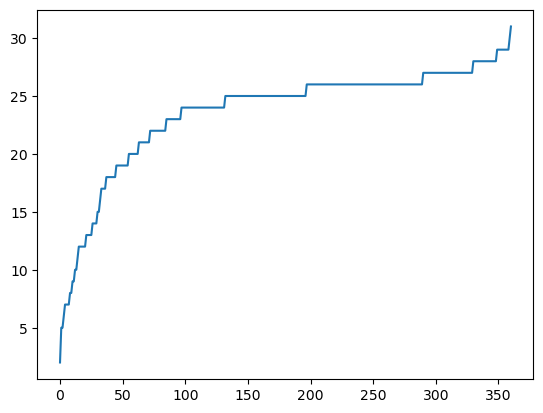

: 

In [4]:
col_list=get_cluster_data(decoder_locats)
num_times_recovered_list=[]
inn_list_max_list=[]
for i in range(361):
    G_i=medium.T[i]
    inn_list=abs(np.inner(G_i, col_list.conj()))
    inn_list_max_list.append(np.max(inn_list))
    num_times_recovered=len(inn_list[inn_list>.99])
    num_times_recovered_list.append(num_times_recovered)

num_times_recovered_list=sorted(num_times_recovered_list)
num_times_recovered_list[:5]
plt.plot([i for i in range(361)], num_times_recovered_list)
print(num_times_recovered_list[:5])


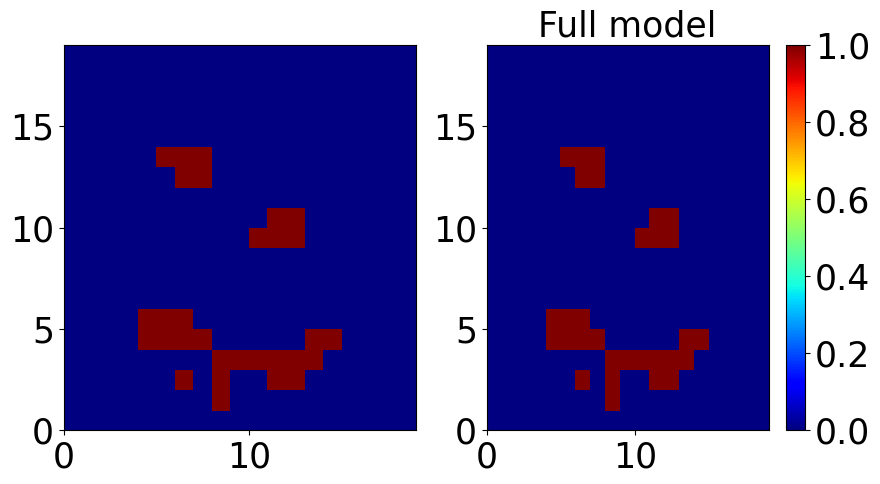

361


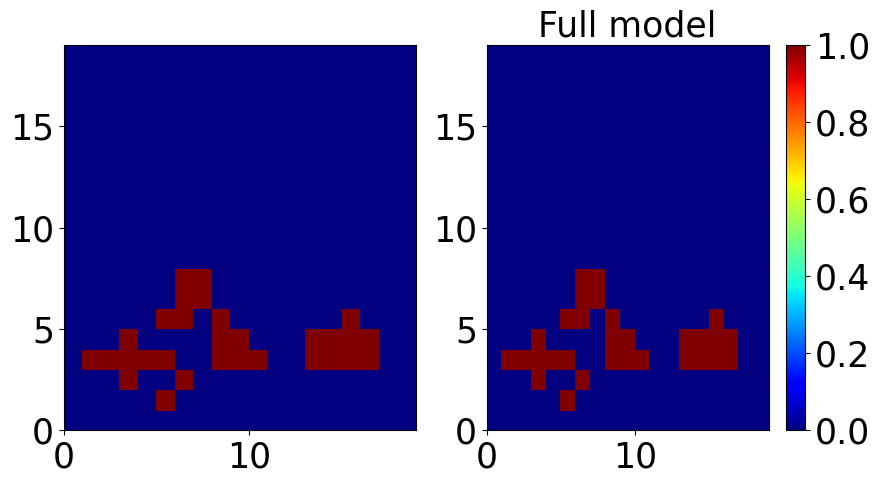

361


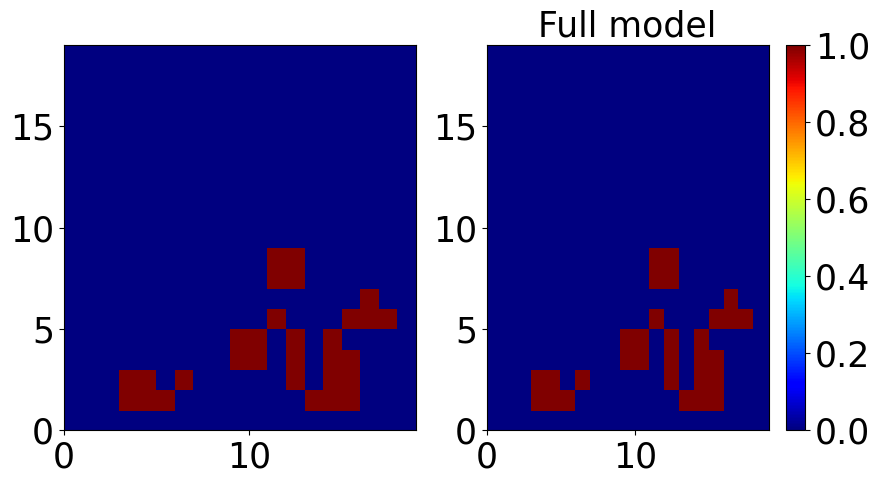

361


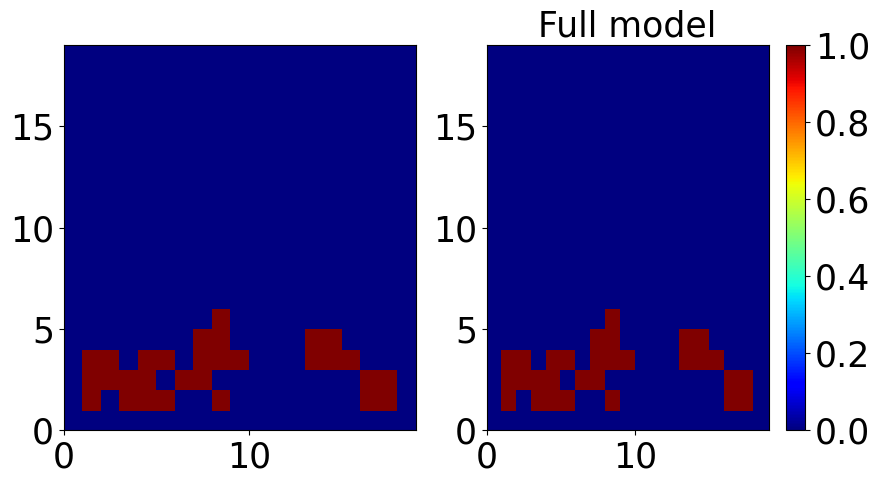

361


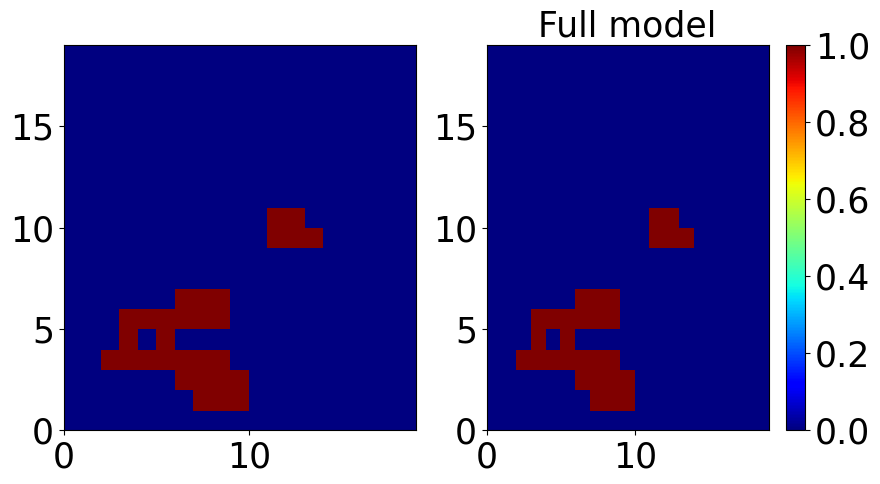

361


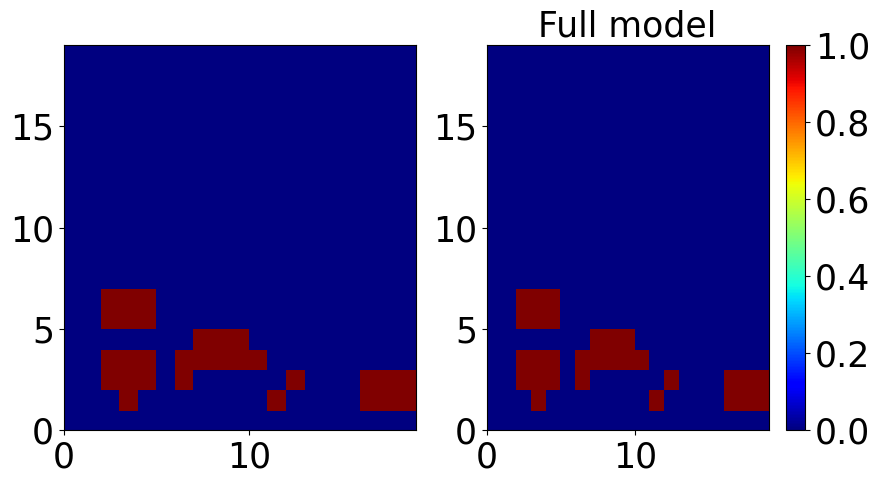

361


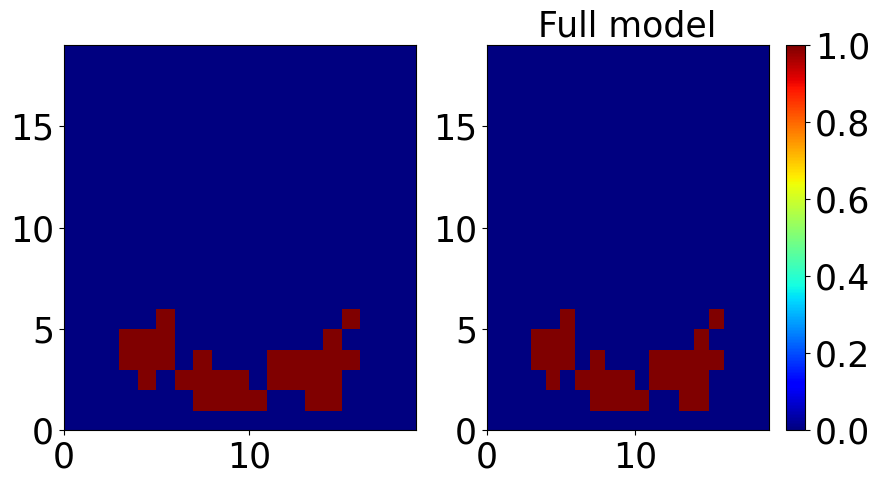

361


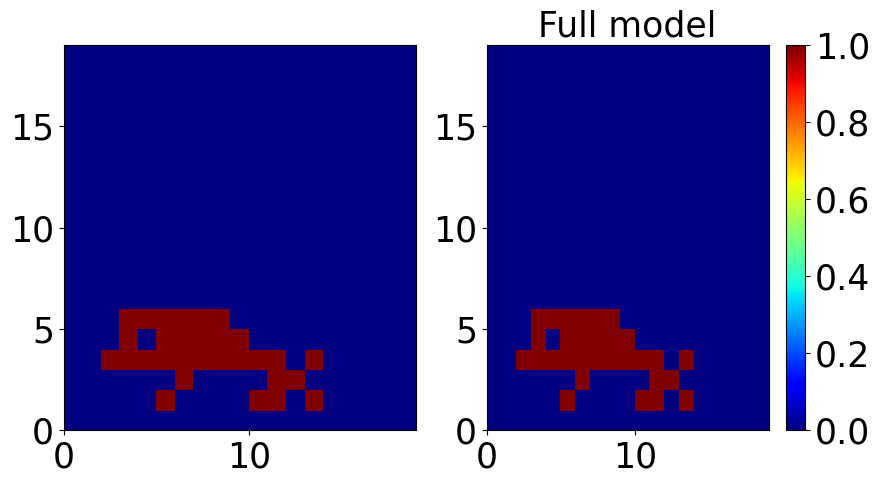

361


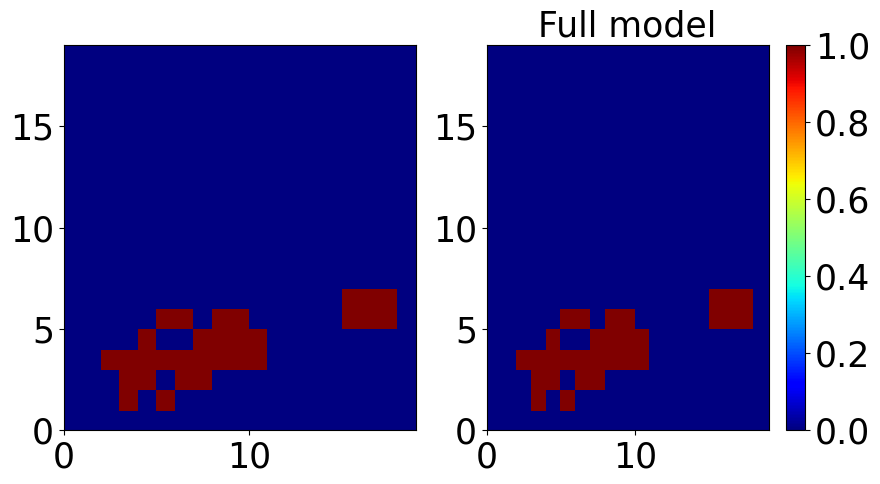

361


In [128]:
index_of_shittiest=[]
for i in range(len(decoder_locats)):
    col_list=get_cluster_data([decoder_locats[i]])
    num_times_recovered_list=[]
    inn_list_max_list=[]
    for i in range(361):
        G_i=medium.T[i]
        inn_list=abs(np.inner(G_i, col_list.conj()))
        inn_list_max_list.append(np.max(inn_list))
        num_times_recovered=len(inn_list[inn_list>.99])
        num_times_recovered_list.append(num_times_recovered)

    #num_times_recovered_list=sorted(num_times_recovered_list)
    #mini, min_idx=min(num_times_recovered_list), np.argmin(num_times_recovered_list)
    rho=np.zeros((2, 361*2))
    #rho=np.zeros((400))
    #A = np.array([1, 7, 9, 2, 0.1, 17, 17, 1.5])
    k = 10

    idx = np.argpartition(inn_list_max_list, k)
    rho[0, idx[:k]]=1
    rho_hat=np.zeros((2, 361))
    
    rho_hat[0, idx[:k]]=1
    rho=torch.tensor(rho)
    rho_hat=torch.tensor(rho_hat)
    #rho[22+20]=1
    #rho[400-22-1-20]=1
    #rho[400-37-1-20]=1
    #rho[210]=1
    H.plot_2_imgs(rho, rho_hat,ind=0, figsize=5, scaling=None, xpix=19, ypix=19, font_size=25)

    print(len(num_times_recovered_list))
    #plt.plot([i for i in range(361)], num_times_recovered_list)
    index_of_shittiest.append(idx[:k])
intersections=[]
index_of_shittiest=np.concatenate(index_of_shittiest)
inex_of_shittiest=list(index_of_shittiest)  
num_inter=[]
for i in set(inex_of_shittiest):
    if list(index_of_shittiest).count(i)>1:
        intersections.append(i)
        num_inter.append(list(index_of_shittiest).count(i))
#index_of_shittiest=np.concatenate(index_of_shittiest)

In [130]:
intersections=[]
index_of_shittiest=np.concatenate(index_of_shittiest)
inex_of_shittiest=list(index_of_shittiest)  
num_inter=[]
for i in set(inex_of_shittiest):
    if list(index_of_shittiest).count(i)>1:
        intersections.append(i)
        num_inter.append(list(index_of_shittiest).count(i))
len(intersections)

65

In [127]:
num_inter

[2, 2, 2, 5, 2, 8, 3, 3, 2, 4, 2, 3, 2, 4, 3, 2, 4, 2, 2]

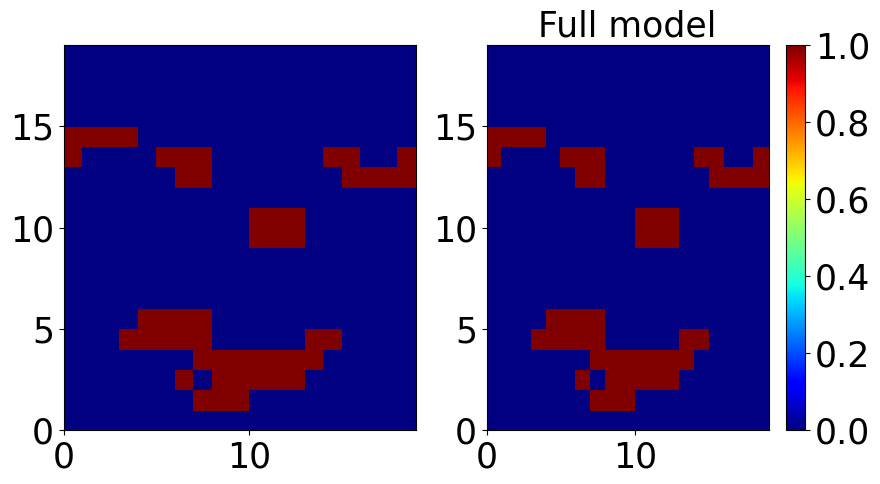

361


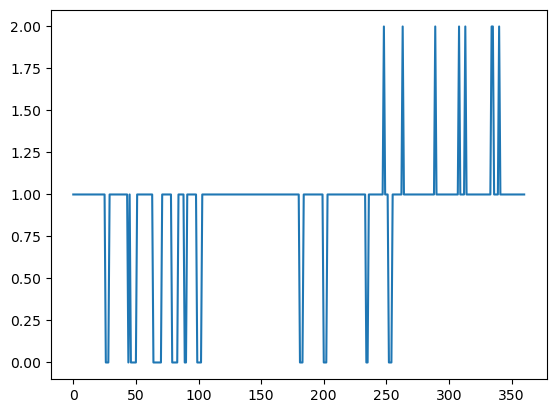

In [ ]:
num_times_recovered_list=[]
for i in range(361):
    G_i=medium.T[i]
    inn_list=abs(np.inner(G_i, col_list.conj()))
    num_times_recovered=len(inn_list[inn_list>.99])
    num_times_recovered_list.append(num_times_recovered)

#num_times_recovered_list=sorted(num_times_recovered_list)
#mini, min_idx=min(num_times_recovered_list), np.argmin(num_times_recovered_list)
rho=np.zeros((2, 361*2))
#rho=np.zeros((400))
#A = np.array([1, 7, 9, 2, 0.1, 17, 17, 1.5])
k = 50

idx = np.argpartition(num_times_recovered_list, k)
rho[0, idx[:k]]=1
rho_hat=np.zeros((2, 361))
rho_hat[0, idx[:k]]=1
rho=torch.tensor(rho)
rho_hat=torch.tensor(rho_hat)
#rho[22+20]=1
#rho[400-22-1-20]=1
#rho[400-37-1-20]=1
#rho[210]=1
H.plot_2_imgs(rho, rho_hat,ind=0, figsize=5, scaling=None, xpix=19, ypix=19, font_size=25)

print(len(num_times_recovered_list))
plt.plot([i for i in range(361)], num_times_recovered_list)

In [61]:
sum(num_times_recovered_list)

337

In [45]:
stupidc=np.array([[1,2,3],[4,5,6]])
teter=np.array([2,3,1])
print(np.inner(teter, stupidc))
sum([teter[j]*stupidc[0][j] for j in range(3)])

[11 29]


11

In [46]:
G_i[0]

(-0.0004134046748907342-0.031893934796895305j)

In [52]:
sum([G_i[j]*col_list[0][j].conj() for j in range(361)]),inn_list[0]

((-0.008195868544383473-0.014699737928543762j),
 (-0.025864255623118268-0.02422043231165283j))

In [26]:
G_i.shape, col_list[0].shape

((806,), (806,))